<a href="https://colab.research.google.com/github/seunghwan1228/Time-Series-Example/blob/master/TimeSereis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Time Series Forecast

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from keras.preprocessing.sequence import TimeseriesGenerator
from keras import models, layers, callbacks
from keras.utils import plot_model
import os
import warnings

warnings.filterwarnings('ignore')

## Download Data

In [3]:
!wget https://s3.amazonaws.com/keras-datasets/jena_climate_2009_2016.csv.zip

--2019-11-12 10:50:30--  https://s3.amazonaws.com/keras-datasets/jena_climate_2009_2016.csv.zip
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.66.35
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.66.35|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13568290 (13M) [application/zip]
Saving to: ‘jena_climate_2009_2016.csv.zip’

jena_climate_2009_2 100%[===================>]  12.94M  7.13MB/s    in 1.8s    

2019-11-12 10:50:33 (7.13 MB/s) - ‘jena_climate_2009_2016.csv.zip’ saved [13568290/13568290]



## Unzip data

In [4]:
!unzip /content/jena_climate_2009_2016.csv.zip

Archive:  /content/jena_climate_2009_2016.csv.zip
  inflating: jena_climate_2009_2016.csv  


## load data

In [0]:
df = pd.read_csv('/content/jena_climate_2009_2016.csv')

In [97]:
df.head()

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.3,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
1,01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.4,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2,01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.9,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
3,01.01.2009 00:40:00,996.51,-8.31,265.12,-9.07,94.2,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
4,01.01.2009 00:50:00,996.51,-8.27,265.15,-9.04,94.1,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3


# convert time as index

In [0]:
df.set_index('Date Time', drop=True, inplace=True)

In [99]:
df.head()

,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
Date Time,,,,,,,,,,,,,,
01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.3,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.4,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.9,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
01.01.2009 00:40:00,996.51,-8.31,265.12,-9.07,94.2,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
01.01.2009 00:50:00,996.51,-8.27,265.15,-9.04,94.1,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3


In [100]:
df.shape

(420551, 14)

## slice data : 420551 <- Too many 

## Use only 100000 Obs

In [0]:
df = df.iloc[:200000, :]

In [102]:
df.head()

,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
Date Time,,,,,,,,,,,,,,
01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.3,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.4,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.9,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
01.01.2009 00:40:00,996.51,-8.31,265.12,-9.07,94.2,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
01.01.2009 00:50:00,996.51,-8.27,265.15,-9.04,94.1,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3


In [103]:
df.shape

(200000, 14)

## Single Variables <- Use only Single Feature

### Only Use :  < T (degC) >

In [0]:
temp_data = df['T (degC)']

In [105]:
# it returns pandas series, not dataframe

temp_data

Date Time
01.01.2009 00:10:00    -8.02
01.01.2009 00:20:00    -8.41
01.01.2009 00:30:00    -8.51
01.01.2009 00:40:00    -8.31
01.01.2009 00:50:00    -8.27
                       ...  
19.10.2012 21:00:00    14.78
19.10.2012 21:10:00    14.40
19.10.2012 21:20:00    14.06
19.10.2012 21:30:00    13.60
19.10.2012 21:40:00    13.42
Name: T (degC), Length: 200000, dtype: float64

In [106]:
# convert to data Frame
temp_data = pd.DataFrame(temp_data)

temp_data.head()

,T (degC)
Date Time,
01.01.2009 00:10:00,-8.02
01.01.2009 00:20:00,-8.41
01.01.2009 00:30:00,-8.51
01.01.2009 00:40:00,-8.31
01.01.2009 00:50:00,-8.27


(array([     0.,  25000.,  50000.,  75000., 100000., 125000., 150000.,
        175000., 200000.]), <a list of 9 Text xticklabel objects>)

<Figure size 720x720 with 0 Axes>

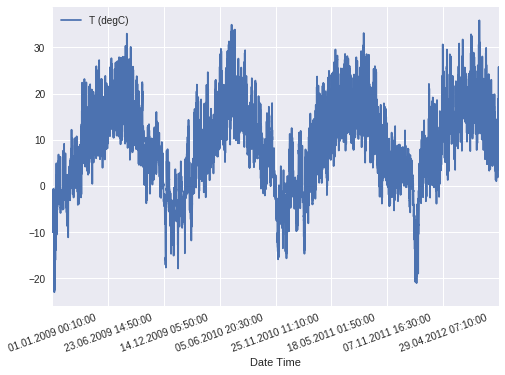

In [107]:
# plot time series
plt.figure(figsize=(10,10))
plt.style.use('seaborn')      # convert plot as seaborn type 
temp_data.plot()              # disply line 
plt.xticks(rotation=20)       # rotation x ticks

## split
### 1) train : 0.70  
### 2) validation : 0.20 
### 3) test : 0.10

In [108]:
temp_data.shape

(200000, 1)

In [0]:
train_index = int(200000 * 0.7)

In [0]:
validation_index = int(200000 * 0.2)

In [0]:
test_index = int(200000 * 0.1)

In [112]:
print(train_index, validation_index, test_index)


140000 40000 20000


In [0]:
train = temp_data[:train_index]

validation = temp_data[train_index:(train_index + validation_index)]

test = temp_data[(train_index + validation_index): ]

In [114]:
train.shape

(140000, 1)

In [115]:
validation.shape

(40000, 1)

In [118]:
test.shape

(20000, 1)

## 1) check data split 

## 2) Data Set Property:

data stored by 10 minutes:

option) example

1 hour data -> predict next 10 min data for 1 hour (6 obs)

In [121]:
print('train head')
display(train.head())
print('train tail')
display(train.tail())
print('-----------------------')
print('validation head')
display(validation.head())
print('validation tail')
display(validation.tail())
print('----------------------')
print('test head')
display(test.head())
print('test head')
display(test.tail())

train head


,T (degC)
Date Time,
01.01.2009 00:10:00,-8.02
01.01.2009 00:20:00,-8.41
01.01.2009 00:30:00,-8.51
01.01.2009 00:40:00,-8.31
01.01.2009 00:50:00,-8.27


train tail


,T (degC)
Date Time,
30.08.2011 05:00:00,7.37
30.08.2011 05:10:00,7.51
30.08.2011 05:20:00,8.08
30.08.2011 05:30:00,7.93
30.08.2011 05:40:00,7.44


-----------------------
validation head


,T (degC)
Date Time,
30.08.2011 05:50:00,7.46
30.08.2011 06:00:00,7.51
30.08.2011 06:10:00,6.93
30.08.2011 06:20:00,7.06
30.08.2011 06:30:00,7.49


validation tail


,T (degC)
Date Time,
02.06.2012 23:40:00,9.41
02.06.2012 23:50:00,8.95
03.06.2012 00:00:00,8.84
03.06.2012 00:10:00,8.80
03.06.2012 00:20:00,8.72


----------------------
test head


,T (degC)
Date Time,
03.06.2012 00:30:00,8.69
03.06.2012 00:40:00,8.61
03.06.2012 00:50:00,8.53
03.06.2012 01:00:00,8.61
03.06.2012 01:10:00,8.46


test head


,T (degC)
Date Time,
19.10.2012 21:00:00,14.78
19.10.2012 21:10:00,14.40
19.10.2012 21:20:00,14.06
19.10.2012 21:30:00,13.60
19.10.2012 21:40:00,13.42


## Concat < train + validation > to get scaling 

## Min Max scaling 
## $X_{sc}$ = $\frac{X - X_{min}}{X_{max} - X_{min}}$


----------------------------
## Standard Scaling
##  $x_{sc} = \frac{x - \bar{x}}{\sigma}$

$\bar{x}$ : Mean X

$\sigma$ : Standard Deviation

In [122]:
print(train.shape)
print(validation.shape)

(140000, 1)
(40000, 1)


In [0]:
full_train = np.concatenate([train, validation])

In [124]:
full_train.shape

(180000, 1)

In [0]:
# 1) min max scale

minmax_scale = MinMaxScaler()

minmax_scale_result = minmax_scale.fit_transform(full_train)

In [0]:
# 2) standard scale

standard_scale = StandardScaler()

standard_scale_result = standard_scale.fit_transform(full_train)

### Use only Standard Scale just for example

In [127]:
standard_scale_result

array([[-1.85711709],
       [-1.90158789],
       [-1.91299065],
       ...,
       [ 0.06538945],
       [ 0.06082835],
       [ 0.05170613]])

In [128]:
standard_scale_result.shape

(180000, 1)

In [0]:
train = standard_scale_result[ : 140000]
validation = standard_scale_result[140000 : ]

In [131]:
print('train')
print(train.shape)
print('\n')
print('validation')
print(validation.shape)

train
(140000, 1)


validation
(40000, 1)


## Data preparation for LSTM

### LSTM requires 3-D (Samples, TimeSteps, Features) 

### Single preparation shape <- (?, ?, 1)




### Create Keras Generator


### < Check the shame with change length, batch_size  >

In [0]:
TimeseriesGenerator??  # <- return generator full source code

In [0]:
train_generator = TimeseriesGenerator(train, train, length=6, batch_size=6)

In [138]:
counter = 0
for i in train_generator:
  print('Full Generator Components\n')
  print(i)
  print('-----------------\n')
  print('X_DATA\n')
  print(i[0])
  print(i[0].shape)

  print('-----------------\n')
  print('Y_DATA\n')
  print(i[1])
  print(i[1].shape)

  # generator <- generate whole data sets, below is only for show 1 generator result
  counter += 1
  if counter == 1:
    break

Full Generator Components

(array([[[-1.85711709],
        [-1.90158789],
        [-1.91299065],
        [-1.89018512],
        [-1.88562401],
        [-1.86053792]],

       [[-1.90158789],
        [-1.91299065],
        [-1.89018512],
        [-1.88562401],
        [-1.86053792],
        [-1.81150603]],

       [[-1.91299065],
        [-1.89018512],
        [-1.88562401],
        [-1.86053792],
        [-1.81150603],
        [-1.81150603]],

       [[-1.89018512],
        [-1.88562401],
        [-1.86053792],
        [-1.81150603],
        [-1.81150603],
        [-1.84457405]],

       [[-1.88562401],
        [-1.86053792],
        [-1.81150603],
        [-1.81150603],
        [-1.84457405],
        [-1.90386844]],

       [[-1.86053792],
        [-1.81150603],
        [-1.81150603],
        [-1.84457405],
        [-1.90386844],
        [-1.94149757]]]), array([[-1.81150603],
       [-1.81150603],
       [-1.84457405],
       [-1.90386844],
       [-1.94149757],
       [-1.95518089]]

## How many sets generated

In [0]:
full_generator_x = []
full_generator_y = []
for i in train_generator:
  full_generator_x.append(i[0])
  full_generator_y.append(i[1])

In [148]:
len(full_generator_x)

23333

In [149]:
len(full_generator_y)

23333

## Define Train, validation generator (Train generator is the same above)

In [0]:
train_generator = TimeseriesGenerator(train, train, length=6, batch_size=6)

valid_generator = TimeseriesGenerator(validation, validation, length=6, batch_size=6)

## Define simple lstm model

In [0]:
model = models.Sequential()
model.add(layers.CuDNNLSTM(32, input_shape=(6,1)))   # just for increase training speed, used CuDNN LSTM   # input_shape = (generator_batch_size, n_features)
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1))


model.compile(loss='mse', optimizer='rmsprop', metrics=['mae'])

## Input shape  = (generator_batch_size, n_feature)

## For Single value, n_feature = 1

In [161]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 32)                4992      
_________________________________________________________________
dense_3 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 17        
Total params: 5,537
Trainable params: 5,537
Non-trainable params: 0
_________________________________________________________________


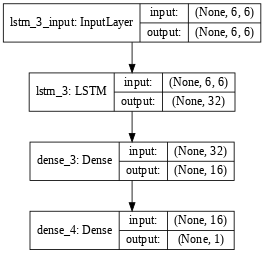

In [162]:
plot_model(model, show_shapes=True, dpi=60)

## Create Usefull Callback

In [0]:
# callback 1) model check point
call_cp = callbacks.ModelCheckpoint('lstm_model.h5', monitor='val_loss', verbose=1, save_best_only=True)

# callback 2) reduce learning rate
call_lr = callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=5, verbose=1)

# callback 3) early stop
call_es = callbacks.EarlyStopping(monitor='val_loss', patience=10, verbose=1)

## Fit model 

### created generator, 
### to fit the model, use " fit_generator "

In [168]:
train_step = train_generator.end_index // train_generator.batch_size
print('train_step : ', train_step, '\n')

valid_step = valid_generator.end_index // valid_generator.batch_size
print('valid_step : ', valid_step, '\n')

train_step :  23333 

valid_step :  6666 



## By setting callback : verbose = 1
### 1) can see when model is saved
### 2) how optimizer learning rate reduced

In [174]:
# just for example, used 10 epoch

model_result = model.fit_generator(train_generator, 
                                   steps_per_epoch= train_step, 
                                   epochs=10, 
                                   validation_data=valid_generator, 
                                   validation_steps=valid_step, 
                                   callbacks = [call_cp, call_lr, call_es])

Epoch 1/10
23333/23333 [==============================] - 154s 7ms/step - loss: 0.0016 - mean_absolute_error: 0.0279 - val_loss: 9.8277e-04 - val_mean_absolute_error: 0.0184

Epoch 00001: val_loss improved from inf to 0.00098, saving model to lstm_model.h5
Epoch 2/10
23333/23333 [==============================] - 155s 7ms/step - loss: 0.0010 - mean_absolute_error: 0.0227 - val_loss: 5.8914e-04 - val_mean_absolute_error: 0.0164

Epoch 00002: val_loss improved from 0.00098 to 0.00059, saving model to lstm_model.h5
Epoch 3/10
23333/23333 [==============================] - 156s 7ms/step - loss: 9.7975e-04 - mean_absolute_error: 0.0219 - val_loss: 5.1484e-04 - val_mean_absolute_error: 0.0146

Epoch 00003: val_loss improved from 0.00059 to 0.00051, saving model to lstm_model.h5
Epoch 4/10
23333/23333 [==============================] - 156s 7ms/step - loss: 0.0010 - mean_absolute_error: 0.0220 - val_loss: 0.0016 - val_mean_absolute_error: 0.0285

Epoch 00004: val_loss did not improve from 0.0

## Plot model result

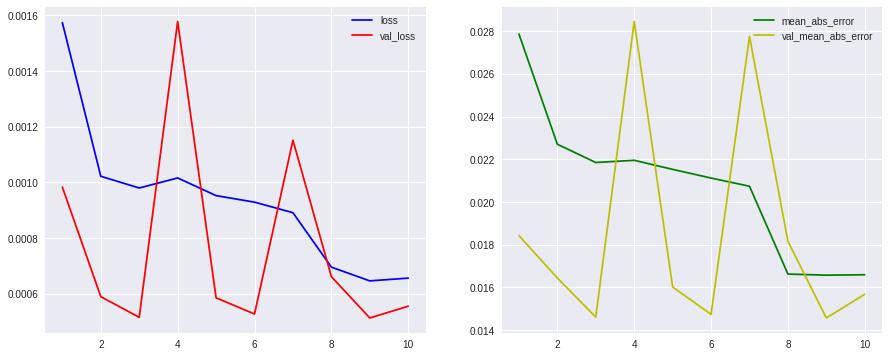

In [186]:
train_result = model_result.history
epoch = np.arange(1, 10 + 1)

plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.plot(epoch, train_result['loss'], label='loss', c='b')
plt.plot(epoch, train_result['val_loss'], label='val_loss', c='r')
plt.legend()

plt.subplot(1,2,2)
plt.plot(epoch, train_result['mean_absolute_error'], label='mean_abs_error', c='g')
plt.plot(epoch, train_result['val_mean_absolute_error'], label='val_mean_abs_error', c='y')
plt.legend()


## load saved model evaluation

In [0]:
saved_model = models.load_model('/content/lstm_model.h5')

In [188]:
saved_model.evaluate_generator(valid_generator, steps=valid_step)

[0.0005125582183091162, 0.014572180740402944]

## Compare the original data & Predicted Data

In [200]:
valid_generator.end_index

39999

In [0]:
y_pred = saved_model.predict_generator(valid_generator)

In [204]:
y_pred.shape

(39994, 1)

In [198]:
validation.shape

(40000, 1)

In [212]:
y_pred.shape

(39994, 1)

In [211]:
sns.scatterplot(y_pred)

ValueError: ignored

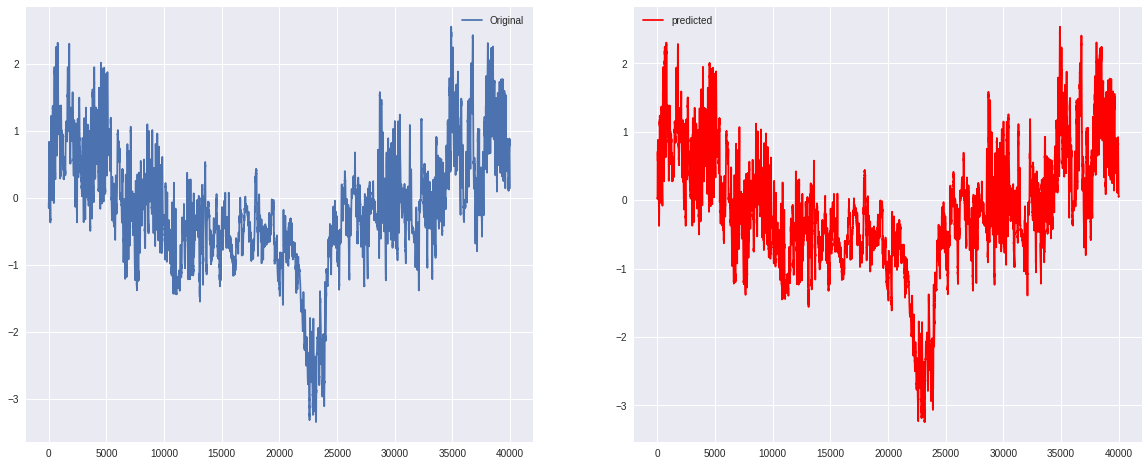

In [229]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.plot(validation[:y_pred.shape[0]], label='Original')
plt.legend()

plt.subplot(1,2,2)
plt.plot(y_pred, label='predicted', c='r')
plt.legend()

## 제네레이터 Batch_size & Length 변경 및 학습 진행

In [0]:
############################################################################
#
#                                숫자 변경  필요                            #
#                generator_batch_size         generator_length
############################################################################

generator_batch_size = 6   # change here
generator_length = 6


# generator
train_generator = TimeseriesGenerator(train, train, length=generator_length, batch_size=generator_batch_size)
valid_generator = TimeseriesGenerator(validation, validation, length=generator_length, batch_size=generator_batch_size)

In [231]:
# 제네레이터 내부 확인

counter = 0
for i in train_generator:
  print('Full Generator Components\n')
  print(i)
  print('-----------------\n')
  print('X_DATA\n')
  print(i[0])
  print(i[0].shape)

  print('-----------------\n')
  print('Y_DATA\n')
  print(i[1])
  print(i[1].shape)

  # generator <- generate whole data sets, below is only for show 1 generator result
  counter += 1
  if counter == 1:
    break

Full Generator Components

(array([[[-1.85711709],
        [-1.90158789],
        [-1.91299065],
        [-1.89018512],
        [-1.88562401],
        [-1.86053792]],

       [[-1.90158789],
        [-1.91299065],
        [-1.89018512],
        [-1.88562401],
        [-1.86053792],
        [-1.81150603]],

       [[-1.91299065],
        [-1.89018512],
        [-1.88562401],
        [-1.86053792],
        [-1.81150603],
        [-1.81150603]],

       [[-1.89018512],
        [-1.88562401],
        [-1.86053792],
        [-1.81150603],
        [-1.81150603],
        [-1.84457405]],

       [[-1.88562401],
        [-1.86053792],
        [-1.81150603],
        [-1.81150603],
        [-1.84457405],
        [-1.90386844]],

       [[-1.86053792],
        [-1.81150603],
        [-1.81150603],
        [-1.84457405],
        [-1.90386844],
        [-1.94149757]]]), array([[-1.81150603],
       [-1.81150603],
       [-1.84457405],
       [-1.90386844],
       [-1.94149757],
       [-1.95518089]]

In [232]:
model = models.Sequential()
model.add(layers.CuDNNLSTM(32, input_shape=(6,1)))   # just for increase training speed, used CuDNN LSTM   # input_shape = (generator_batch_size, n_features)
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1))

model.summary()

model.compile(loss='mse', optimizer='rmsprop', metrics=['mae'])


Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
cu_dnnlstm_2 (CuDNNLSTM)     (None, 32)                4480      
_________________________________________________________________
dense_9 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 17        
Total params: 5,025
Trainable params: 5,025
Non-trainable params: 0
_________________________________________________________________


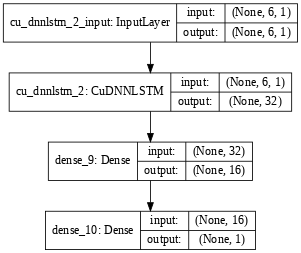

In [233]:
# 모델 내부 Tensor Graph 확인 Plot

plot_model(model, show_shapes=True, dpi=60)

In [234]:
# 학습을 위한 Step 설정

train_step = train_generator.end_index // train_generator.batch_size
print('train_step : ', train_step, '\n')

valid_step = valid_generator.end_index // valid_generator.batch_size
print('valid_step : ', valid_step, '\n')

train_step :  23333 

valid_step :  6666 



In [0]:
# 모델 학습진행시 Callbacks

# callback 1) model check point
call_cp = callbacks.ModelCheckpoint('lstm_model.h5', monitor='val_loss', verbose=1, save_best_only=True)

# callback 2) reduce learning rate
call_lr = callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=5, verbose=1)

# callback 3) early stop
call_es = callbacks.EarlyStopping(monitor='val_loss', patience=10, verbose=1)

In [0]:
# 모델 학습

# just for example, used 10 epoch

############################################################################
#
#                                숫자 변경  필요                            #
#                                  train_epoch
############################################################################

train_epoch = 10



model_result = model.fit_generator(train_generator, 
                                   steps_per_epoch= train_step, 
                                   epochs= train_epoch, 
                                   validation_data=valid_generator, 
                                   validation_steps=valid_step, 
                                   callbacks = [call_cp, call_lr, call_es])

In [0]:
# 학습 loss 그래프

train_result = model_result.history
epoch = np.arange(1, 10 + 1)

plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.plot(epoch, train_result['loss'], label='loss', c='b')
plt.plot(epoch, train_result['val_loss'], label='val_loss', c='r')
plt.legend()

plt.subplot(1,2,2)
plt.plot(epoch, train_result['mean_absolute_error'], label='mean_abs_error', c='g')
plt.plot(epoch, train_result['val_mean_absolute_error'], label='val_mean_abs_error', c='y')
plt.legend()
